# Progress Report: Predicting Future Covid Death Rates 

Data Deducers: Brett Perzee, Connor Gambla, Jakub Pekala, Jennifer Le
Link to ipynb in repository: https://github.com/uic-cs418/group-project-data-deducers/blob/main/418_Final_Project.ipynb


## Introduction

Our project analyzes covid death rates from 2020 to 2023 using the Provisional COVID-19 Deaths by Sex and Age dataset from the CDC. Our goals for this project is to discover intersting insights about past COVID death rates and to create a machine learning model that can answer the question what will COVID death rates look like in the future. Our hypothesis is that COVID-19 death rates are most heavily related to age demographic.

## Changes From Project Proposal

Originally we planned to answer the question of how the pandemic has affected education but we couldn't find enough data to answer this question effectivly so we decided to focus on COVID death rates and prediciting future death rates instead. 

## Exploratory Data Analysis 

In [45]:
from importlib import reload
# warnings.filterwarnings("ignore")
import functionsForProject
reload(functionsForProject)
from functionsForProject import *

We split the main dataset into 3 datasets in order to give us more freedom to use secific scopes of the data for different applications. Through EDA we found that the month with the most amount of COVID deaths was January 2021.

In [46]:
df = grab_df()
df.head()
total_df, year_df, month_df = split_dataframes(df)
show_max_deaths_in_month(month_df)
df.head(1)

Max Deaths from Covid in a month of 105565 from: 2021-01-01 to 2021-01-31


,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,09/27/2023,2020-01-01,09/23/2023,By Total,NaN,NaN,United States,All Sexes,All Ages,1146774.0,12303399.0,1162844.0,569264.0,22229.0,1760095.0,NaN


In [47]:
empty_cells(total_df, year_df, month_df)

465
2753
36212


In [48]:
#Data Cleaning
total_df, year_df, month_df = clean_data(total_df, year_df, month_df)

In [49]:
empty_cells(total_df, year_df, month_df)

0
0
0


We then grouped the split datasets by Age Groups

In [50]:
total_age_df, month_age_df, year_age_df, year_age_df_dte_formatted = group_by_age(total_df, year_df, month_df)
year_age_df.head(1)

,Age Group,Start Date,COVID-19 Deaths
0,0-17 years,01/01/2020,523.0


In [51]:
total_age_df.head(1)

,Age Group,Start Date,COVID-19 Deaths
0,0-17 years,2020-01-01,6517.0


In [52]:
month_age_df.head(1)

,Age Group,Start Date,COVID-19 Deaths
0,0-17 years,2020-01-01,0.0


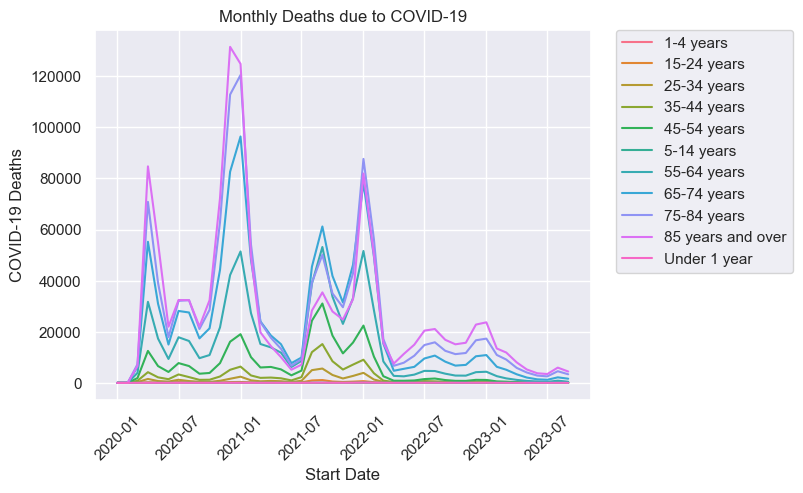

In [53]:
line_graphs_monthly_deaths(month_age_df)

## Machine Learning Analysis 
The goal of this project was 2 fold. First was to understand how COVID-19 effected each demographic. The second is determining and constructing a model that would be able to help predict future deaths rates due to COVID-19. In this portion of the notebook, we will use machine learning to accomplish predicting future death rates. Since the data at hand is time-series, we used both ARMA and ARIMA models to attempt to benchmark future deaths. Since monthly death rates had the most detailed breakdown of COVID-19 deaths, we used monthly deaths for each demographic. 

The features for the model was broken down demographic, the month, and the death toll for each respective demographic that month. Because of the detail of the breakdown, we used the more detailed age demographic datebase as our data. We used the first 40 months of the pandemic training data. The testing set was the last recorded 5 months of the pandemic(March 2023-September 2023). The output of the model is the estimated death toll for the next X months of the pandemic for each demographic. Below are the results of the predictions for both the ARMA and ARIMA models

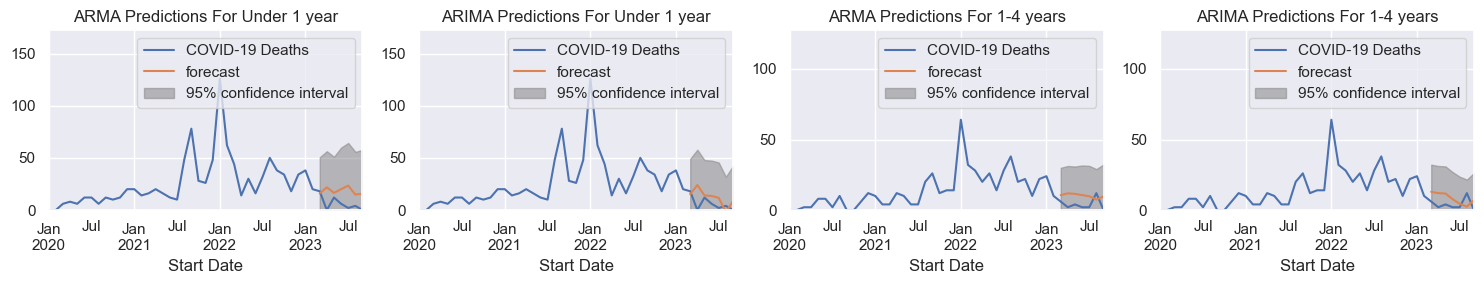

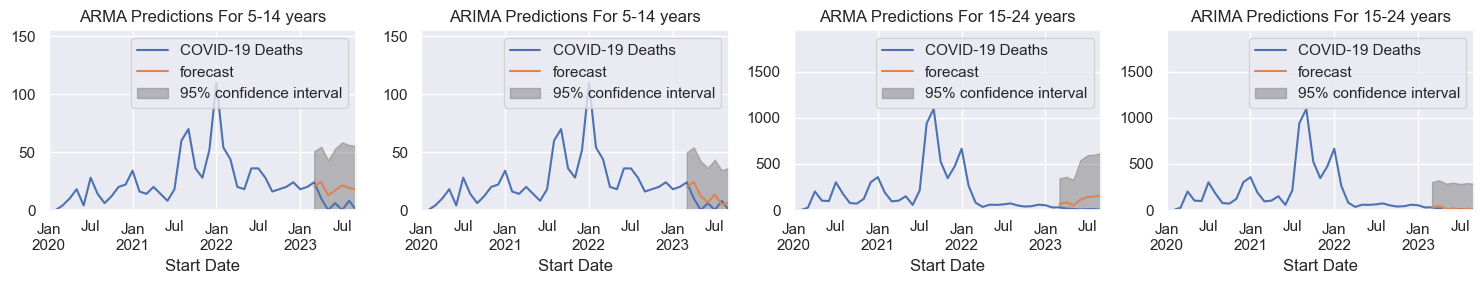

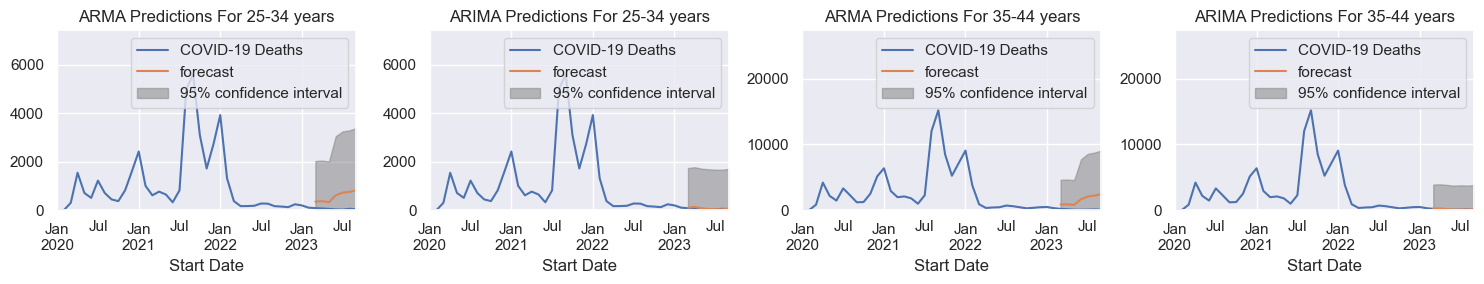

In [57]:
graph_models1(month_age_df)

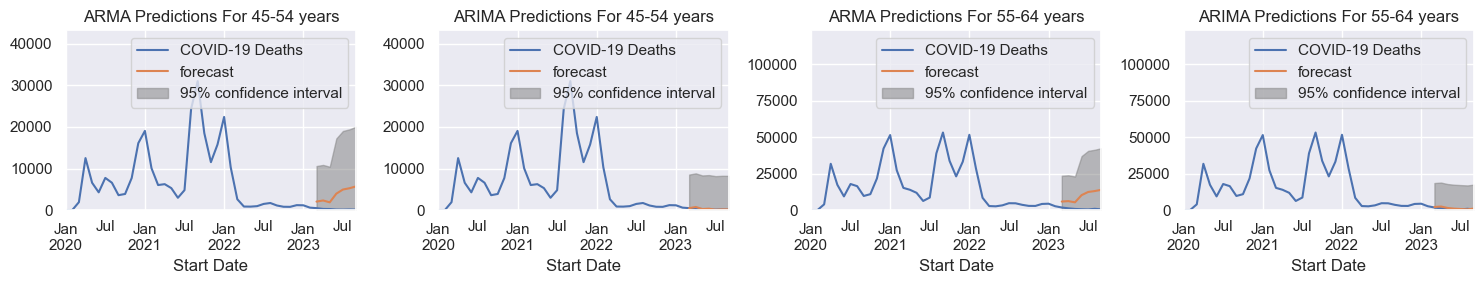

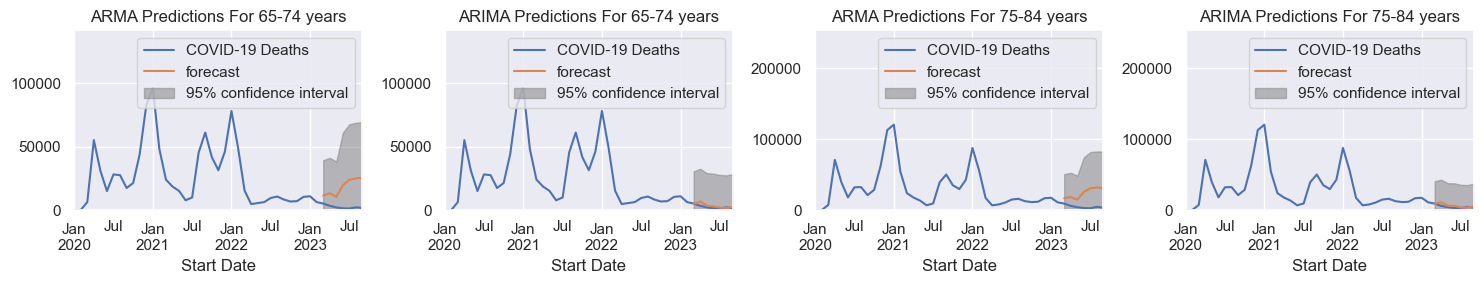

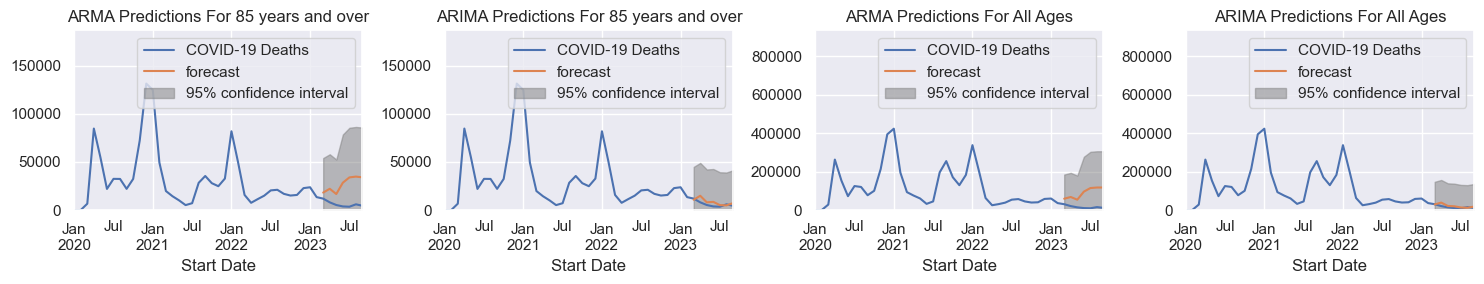

In [58]:
graph_models2(month_age_df)

## Machine Learning Results
The graphs above show both the ARMA and ARIMA forecasts for a given time period. The ARMA model performed alright for younger demographics, but became perpetually more unstable as the age group went up and began to perform more poorly. ARIMA was a much needed improvement, and literally performed magnitudes better than ARMA the higher the age group.

Given the combination of EDA and the high performance of ARIMA in predicting death rates, it can be concluded that death rates due to COVID-19 are heavily correlated with age demographic. 

Sources

https://www.cdc.gov/vaccines/covid-19/clinical-considerations/myocarditis.html#:~:text=Though%20cases%20of%20myocarditis%20and,age%20groups%2C%20and%20after%20other 
https://www2.census.gov/library/publications/decennial/2020/census-briefs/c2020br-06.pdf